In [1]:
import os
import pandas as pd
os.chdir("/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources")
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from functions import *

# Question 1

# a. Load the file, erase the columns "name" and "gender" as they are nominal.

In [22]:
simpsons = pd.read_csv("The Simpsons original.csv")
simpsons_2 = simpsons.drop(columns=["name", "gender"])

# b. Determine the Euclidean distances between the Simpsons.

In [41]:
new = calculate_euclidian_distances(simpsons_2)
new.columns = simpsons.name
new.index = simpsons.name
display(new)

name,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
name,,,,,,,,,
Homer,0.0,100.5,162.1,174.4,232.7,86.9,90.5,70.7,51.2
Marge,100.5,0.0,65.1,76.7,134.3,42.2,12.4,30.3,51.4
Bart,162.1,65.1,0.0,12.8,70.6,100.0,76.8,94.6,115.5
Lisa,174.4,76.7,12.8,0.0,58.5,111.1,88.4,106.4,127.5
Maggie,232.7,134.3,70.6,58.5,0.0,165.1,145.7,164.3,185.3
Abe,86.9,42.2,100.0,111.1,165.1,0.0,31.5,34.7,39.4
Selma,90.5,12.4,76.8,88.4,145.7,31.5,0.0,20.3,40.2
Otto,70.7,30.3,94.6,106.4,164.3,34.7,20.3,0.0,21.6
Krusty,51.2,51.4,115.5,127.5,185.3,39.4,40.2,21.6,0.0


# c. Which Simpsons are closest to each other?

ANSWER -> Selma and Marge (12, 4)

# d. What is the Manhattan distance between Homer and Bart?

In [44]:
new = calculate_manhattan_distances(simpsons_2)
new.columns = simpsons.name
new.index = simpsons.name
display(new)


name,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
name,,,,,,,,,
Homer,0,112,188,206,269,115,103,82,65
Marge,112,0,92,102,169,65,19,34,65
Bart,188,92,0,18,81,141,107,126,149
Lisa,206,102,18,0,67,159,117,136,159
Maggie,269,169,81,67,0,222,184,203,226
Abe,115,65,141,159,222,0,46,51,60
Selma,103,19,107,117,184,46,0,25,46
Otto,82,34,126,136,203,51,25,0,31
Krusty,65,65,149,159,226,60,46,31,0


# e. What is the standardized Euclidean distance between Marge and Maggie (do not use the stats.zscore to calculate the z-scores)?

In [53]:
new = calculate_standardized_euclidean_distances(simpsons_2)
new.columns = simpsons.name
new.index = simpsons.name
display(new)
display(simpsons_2.std())


name,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
name,,,,,,,,,
Homer,0.000000,3.035833,2.633513,3.204813,3.810651,1.956851,2.508438,2.859664,1.806310
Marge,3.035833,0.000000,2.558443,1.907427,2.887089,2.939669,0.641284,0.466102,1.383262
Bart,2.633513,2.558443,0.000000,1.088682,1.206934,3.002985,2.370605,2.811340,2.492437
Lisa,3.204813,1.907427,1.088682,0.000000,1.037280,3.417218,1.992020,2.275275,2.436699
Maggie,3.810651,2.887089,1.206934,1.037280,0.000000,3.916015,2.921597,3.271309,3.315900
Abe,1.956851,2.939669,3.002985,3.417218,3.916015,0.000000,2.306462,2.828975,1.817415
Selma,2.508438,0.641284,2.370605,1.992020,2.921597,2.306462,0.000000,0.622430,0.804150
Otto,2.859664,0.466102,2.811340,2.275275,3.271309,2.828975,0.622430,0.000000,1.154512
Krusty,1.806310,1.383262,2.492437,2.436699,3.315900,1.817415,0.804150,1.154512,0.000000


hair length     3.734226
weight         70.074563
age            21.703174
dtype: float64

# f. Now create a dendrogram (use Euclidean distances)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Distances')

Text(0.5, 1.0, 'Dendrogram')

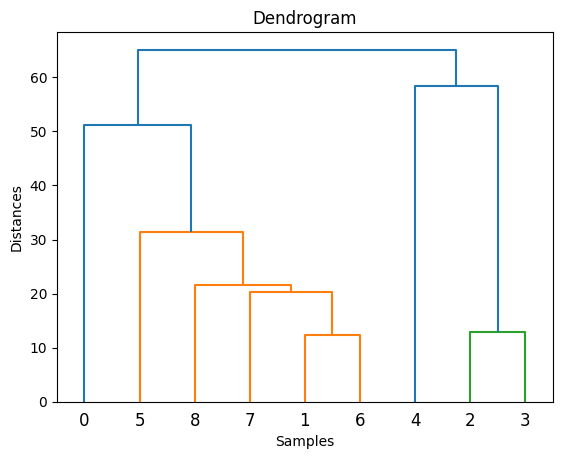

In [56]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

distances = hierarchy.linkage(simpsons_2.values, metric='euclidean')
dendrogram = hierarchy.dendrogram(distances)
plt.xlabel('Samples')
plt.ylabel('Distances')
plt.title('Dendrogram')
plt.show()